In [1]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [2]:
proj_dir = Path("../../../")

In [3]:
bon_df = pd.read_csv(proj_dir / "Data/insitu/fish/processed/DART_BON.csv")
tda_df = pd.read_csv(proj_dir / "Data/insitu/fish/processed/DART_TDA.csv")
lyl_df = pd.read_csv(proj_dir / "Data/insitu/fish/processed/DART_LYL.csv")

In [4]:
bon_df['date'] = pd.to_datetime(bon_df['date'])
tda_df['date'] = pd.to_datetime(tda_df['date'])
lyl_df['date'] = pd.to_datetime(lyl_df['date'])

In [5]:
# filter out 2020 to 2023
bon_df_ = bon_df[(bon_df['date'].dt.year >= 2020) & (bon_df['date'].dt.year <= 2022)]
tda_df_ = tda_df[(tda_df['date'].dt.year >= 2020) & (tda_df['date'].dt.year <= 2022)]
lyl_df_ = lyl_df[(lyl_df['date'].dt.year >= 2020) & (lyl_df['date'].dt.year <= 2022)]
# bon_df_

<Axes: xlabel='date'>

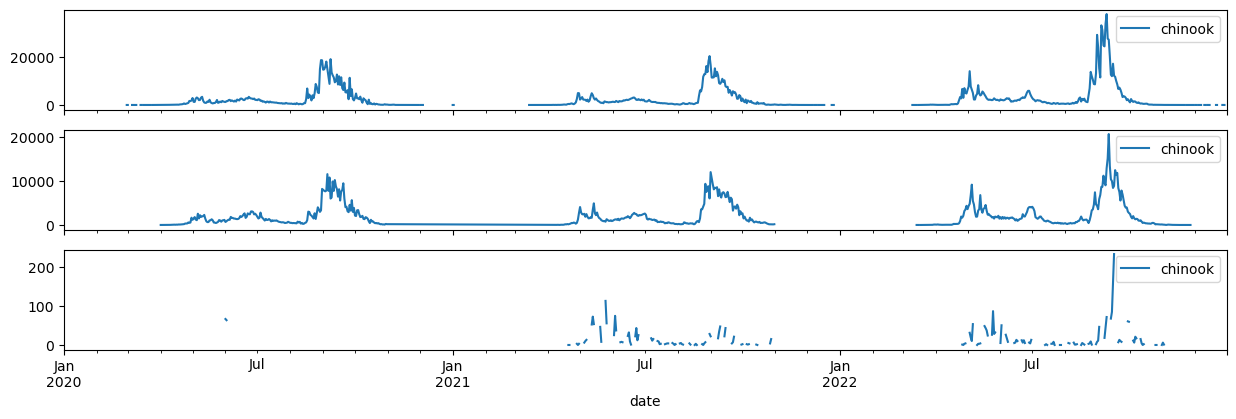

In [7]:
fig, (ax1, ax2, ax3) = plt.subplots(3,1, figsize=(15, 5), sharex=True)
bon_df_.plot(x='date', y=['chinook'], style='-', ax=ax1)
tda_df_.plot(x='date', y=['chinook'], style='-', ax=ax2)
lyl_df_.plot(x='date', y=['chinook'], style='-', ax=ax3)

In [8]:
fall_start_month = 8
fall_start_day = 1
fall_end_month = 11
fall_end_day = 15

In [9]:
bon_df['year'] = bon_df['date'].dt.year
bon_df['month'] = bon_df['date'].dt.month
bon_df['day'] = bon_df['date'].dt.day

tda_df['year'] = tda_df['date'].dt.year
tda_df['month'] = tda_df['date'].dt.month
tda_df['day'] = tda_df['date'].dt.day

lyl_df['year'] = lyl_df['date'].dt.year
lyl_df['month'] = lyl_df['date'].dt.month
lyl_df['day'] = lyl_df['date'].dt.day

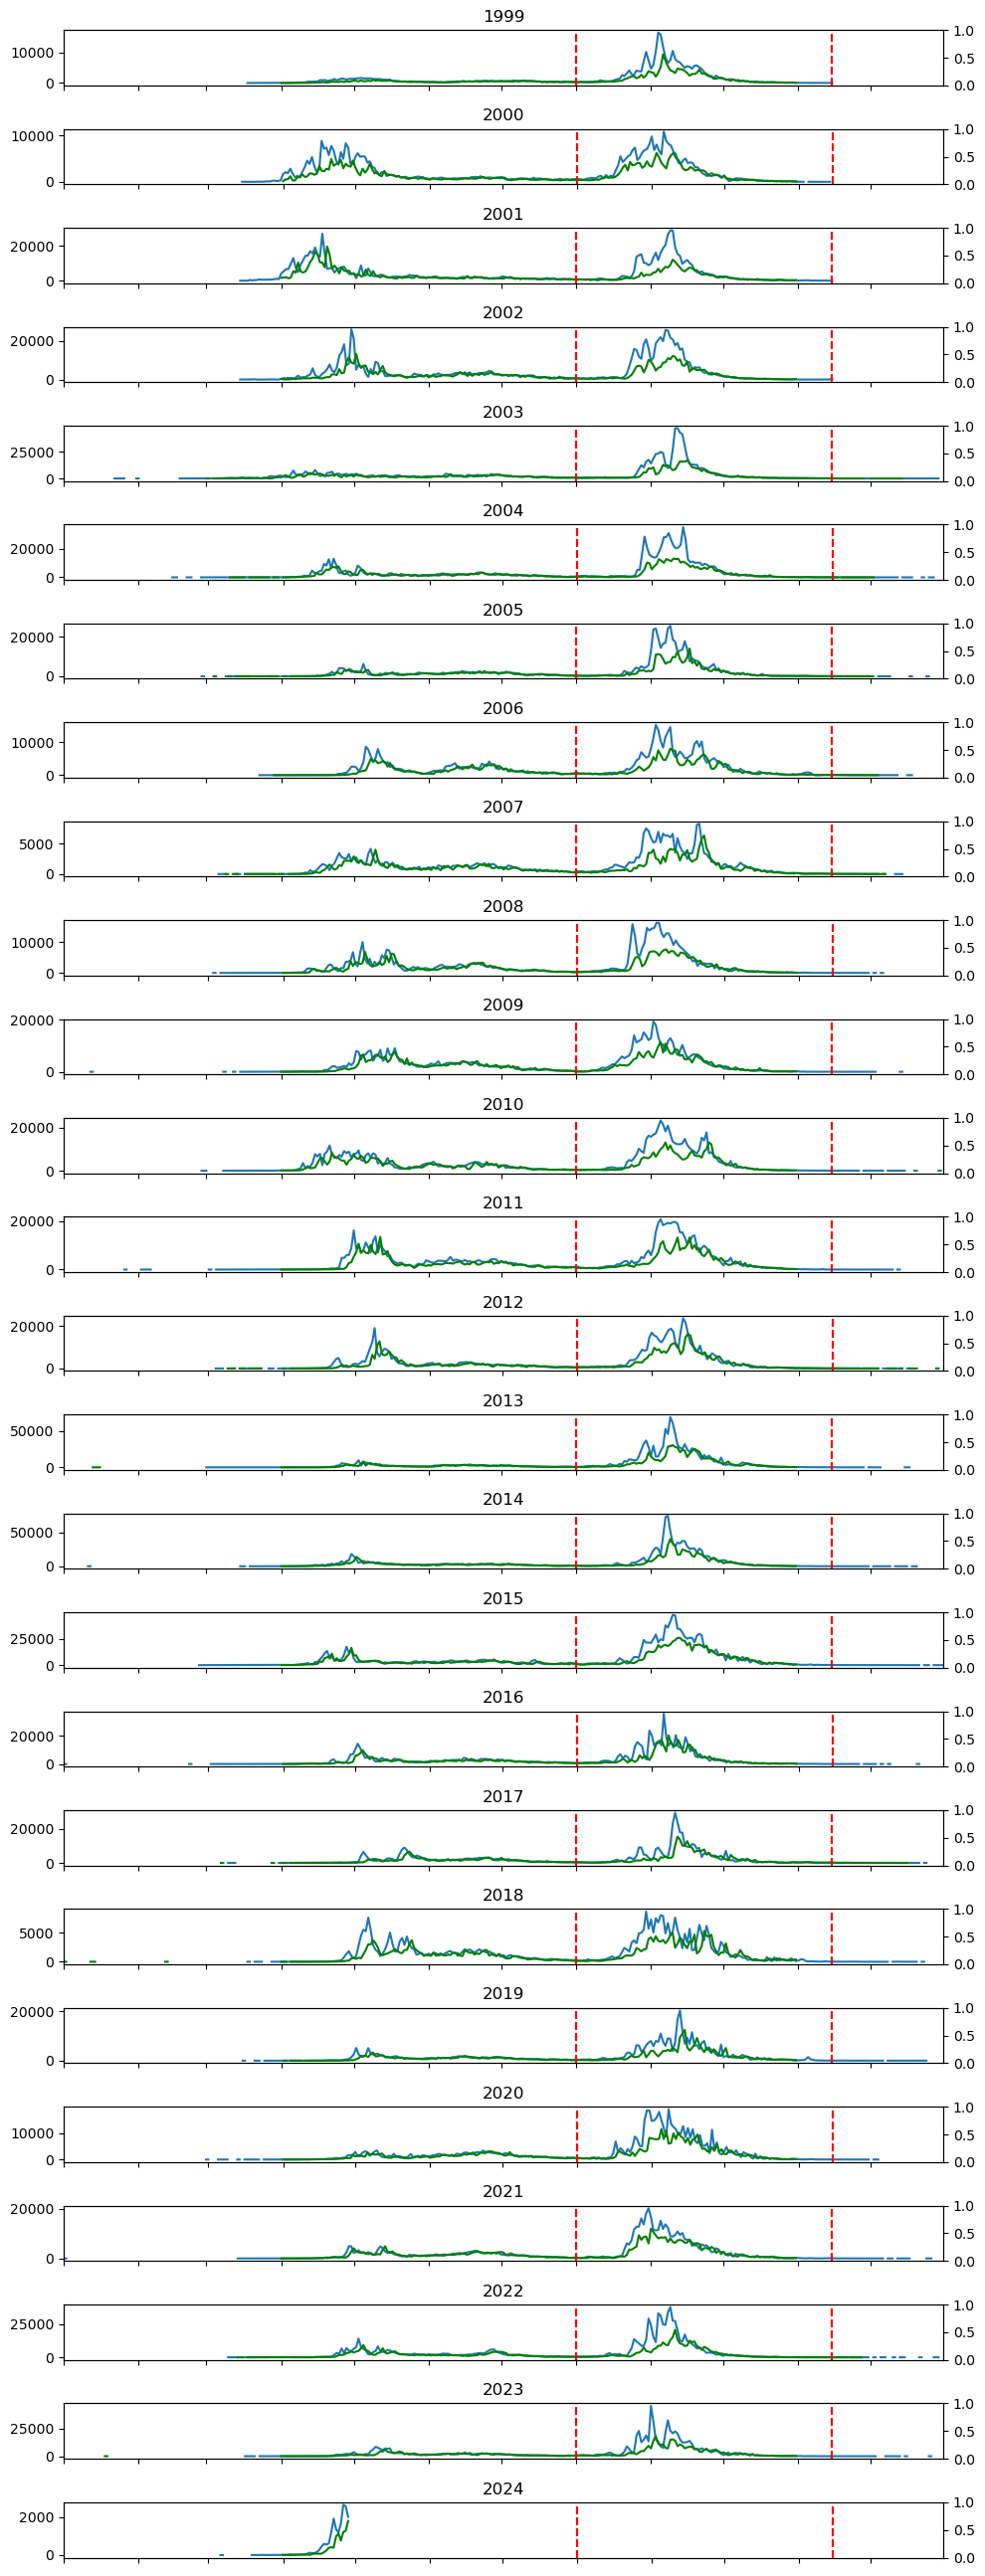

In [11]:
# group bon_df by year and plot
grouped = bon_df.groupby('year')

fig, axs = plt.subplots(len(grouped['year'].unique()), 1, figsize=(10, 1*len(grouped['year'].unique())))
axs2 = [ax.twinx() for ax in axs]
for i, (name, group) in enumerate(grouped):
    # print(group['year'].unique())
    # group.plot(x='date', y=['chinook'], style='-', ax=axs[i])
    axs[i].plot(group['date'], group['chinook'])
    axs[i].set_title(name)
    axs[i].axvline(pd.Timestamp(f"{name}-{fall_start_month}-{fall_start_day}"), color='r', linestyle='--')
    axs[i].axvline(pd.Timestamp(f"{name}-{fall_end_month}-{fall_end_day}"), color='r', linestyle='--')

    axs[i].set_xlim(pd.Timestamp(f"{name}-01-01"), pd.Timestamp(f"{name}-12-31"))

    # remove x-axis labels
    axs[i].set_xticklabels([])


# # add vertical lines for fall
# for i, year in enumerate(grouped['year'].unique()):
#     year = year[0]
#     plt.axvline(pd.Timestamp(f"{year}-{fall_start_month}-{fall_start_day}"), color='r', linestyle='--', ax=axs[i])
#     plt.axvline(pd.Timestamp(f"{year}-{fall_end_month}-{fall_end_day}"), color='r', linestyle='--', ax=axs[i])

# share x-axis amon


grouped = tda_df.groupby('year')

for i, (name, group) in enumerate(grouped):
    # print(group['year'].unique())
    # group.plot(x='date', y=['chinook'], style='-', ax=axs[i])
    axs[i].plot(group['date'], group['chinook'], color='g')
    axs[i].set_title(name)
    axs[i].axvline(pd.Timestamp(f"{name}-{fall_start_month}-{fall_start_day}"), color='r', linestyle='--')
    axs[i].axvline(pd.Timestamp(f"{name}-{fall_end_month}-{fall_end_day}"), color='r', linestyle='--')

    axs[i].set_xlim(pd.Timestamp(f"{name}-01-01"), pd.Timestamp(f"{name}-12-31"))

    # remove x-axis labels
    axs[i].set_xticklabels([])

# grouped = lyl_df.groupby('year')

# for i, (name, group) in enumerate(grouped):
#     # print(group['year'].unique())
#     # group.plot(x='date', y=['chinook'], style='-', ax=axs[i])
#     axs[i].plot(group['date'], group['chinook'], color='g')
#     axs[i].set_title(name)
#     axs[i].axvline(pd.Timestamp(f"{name}-{fall_start_month}-{fall_start_day}"), color='r', linestyle='--')
#     axs[i].axvline(pd.Timestamp(f"{name}-{fall_end_month}-{fall_end_day}"), color='r', linestyle='--')

#     axs[i].set_xlim(pd.Timestamp(f"{name}-01-01"), pd.Timestamp(f"{name}-12-31"))

#     # remove x-axis labels
#     axs[i].set_xticklabels([])


# for i, (name, group) in enumerate(grouped_temp):
#     axs2[i].plot(group['date'], group['AvgTemp'])


fig.tight_layout()


In [13]:
def migration_stats(df, date_col='date', fish_col='chinook', start_month=8, start_day=1, end_month=11, end_day=15):
    df[date_col] = pd.to_datetime(df[date_col])

    df['year'] = df[date_col].dt.year
    df['month'] = df[date_col].dt.month
    df['day'] = df[date_col].dt.day

    df = df.dropna(subset=[fish_col])

    # group bon_df by year and plot
    grouped = df.groupby('year')

    stats_df = pd.DataFrame(columns=['year', 'start_date', 'end_date', 'total_fish', 'daily_mean', 'max_count', '5th_percentile', '5th_date', '25th_percentile', '25th_date', '50th_percentile', '50th_date', '75th_percentile', '75th_date', '95th_percentile', '95th_date'])

    for name, group in grouped:
        stats_dict = {}
        run_start = pd.Timestamp(f"{name}-{start_month}-{start_day}")
        run_end = pd.Timestamp(f"{name}-{end_month}-{end_day}")

        run_df = group[(group[date_col] >= run_start) & (group[date_col] <= run_end)]
        run_df = run_df.sort_values(by=date_col) # sort run_df by date
        
        total_fish = run_df[fish_col].sum()
        # daily mean which is the total fish divided by the number of days from start to end
        daily_mean = total_fish / (run_end - run_start).days
        max_count = run_df[fish_col].max()


        stats_dict['year'] = name
        stats_dict['start_date'] = run_start
        stats_dict['end_date'] = run_end
        stats_dict['total_fish'] = total_fish
        stats_dict['daily_mean'] = daily_mean
        stats_dict['max_count'] = max_count

        # TODO: find a better way to calculate percentiles
        fish_sum = 0
        for i, row in run_df.iterrows():
            fish_sum += row[fish_col]
            
            if fish_sum >= total_fish * 0.05:
                stats_dict['5th_percentile'] = fish_sum
                stats_dict['5th_date'] = row[date_col]
                break

        fish_sum = 0

        for i, row in run_df.iterrows():
            fish_sum += row[fish_col]
            
            if fish_sum >= total_fish * 0.25:
                stats_dict['25th_percentile'] = fish_sum
                stats_dict['25th_date'] = row[date_col]
                break

        fish_sum = 0

        for i, row in run_df.iterrows():
            fish_sum += row[fish_col]
            
            if fish_sum >= total_fish * 0.50:
                stats_dict['50th_percentile'] = fish_sum
                stats_dict['50th_date'] = row[date_col]
                break

        fish_sum = 0

        for i, row in run_df.iterrows():
            fish_sum += row[fish_col]
            
            if fish_sum >= total_fish * 0.75:
                stats_dict['75th_percentile'] = fish_sum
                stats_dict['75th_date'] = row[date_col]
                break

        fish_sum = 0

        for i, row in run_df.iterrows():
            fish_sum += row[fish_col]
            
            if fish_sum >= total_fish * 0.95:
                stats_dict['95th_percentile'] = fish_sum
                stats_dict['95th_date'] = row[date_col]
                break

        stats_df = pd.concat([stats_df, pd.DataFrame(stats_dict, index=[0])])

    return stats_df
                



In [16]:
bon_stats_df = migration_stats(bon_df, start_month=8, start_day=1, end_month=11, end_day=15)
tda_stats_df = migration_stats(tda_df, start_month=8, start_day=4, end_month=10, end_day=31)
lyl_stats_df = migration_stats(lyl_df, start_month=8, start_day=1, end_month=11, end_day=15)

bon_stats_df['duration'] = (bon_stats_df['95th_date'] - bon_stats_df['5th_date']).dt.days
tda_stats_df['duration'] = (tda_stats_df['95th_date'] - tda_stats_df['5th_date']).dt.days
lyl_stats_df['duration'] = (lyl_stats_df['95th_date'] - lyl_stats_df['5th_date']).dt.days

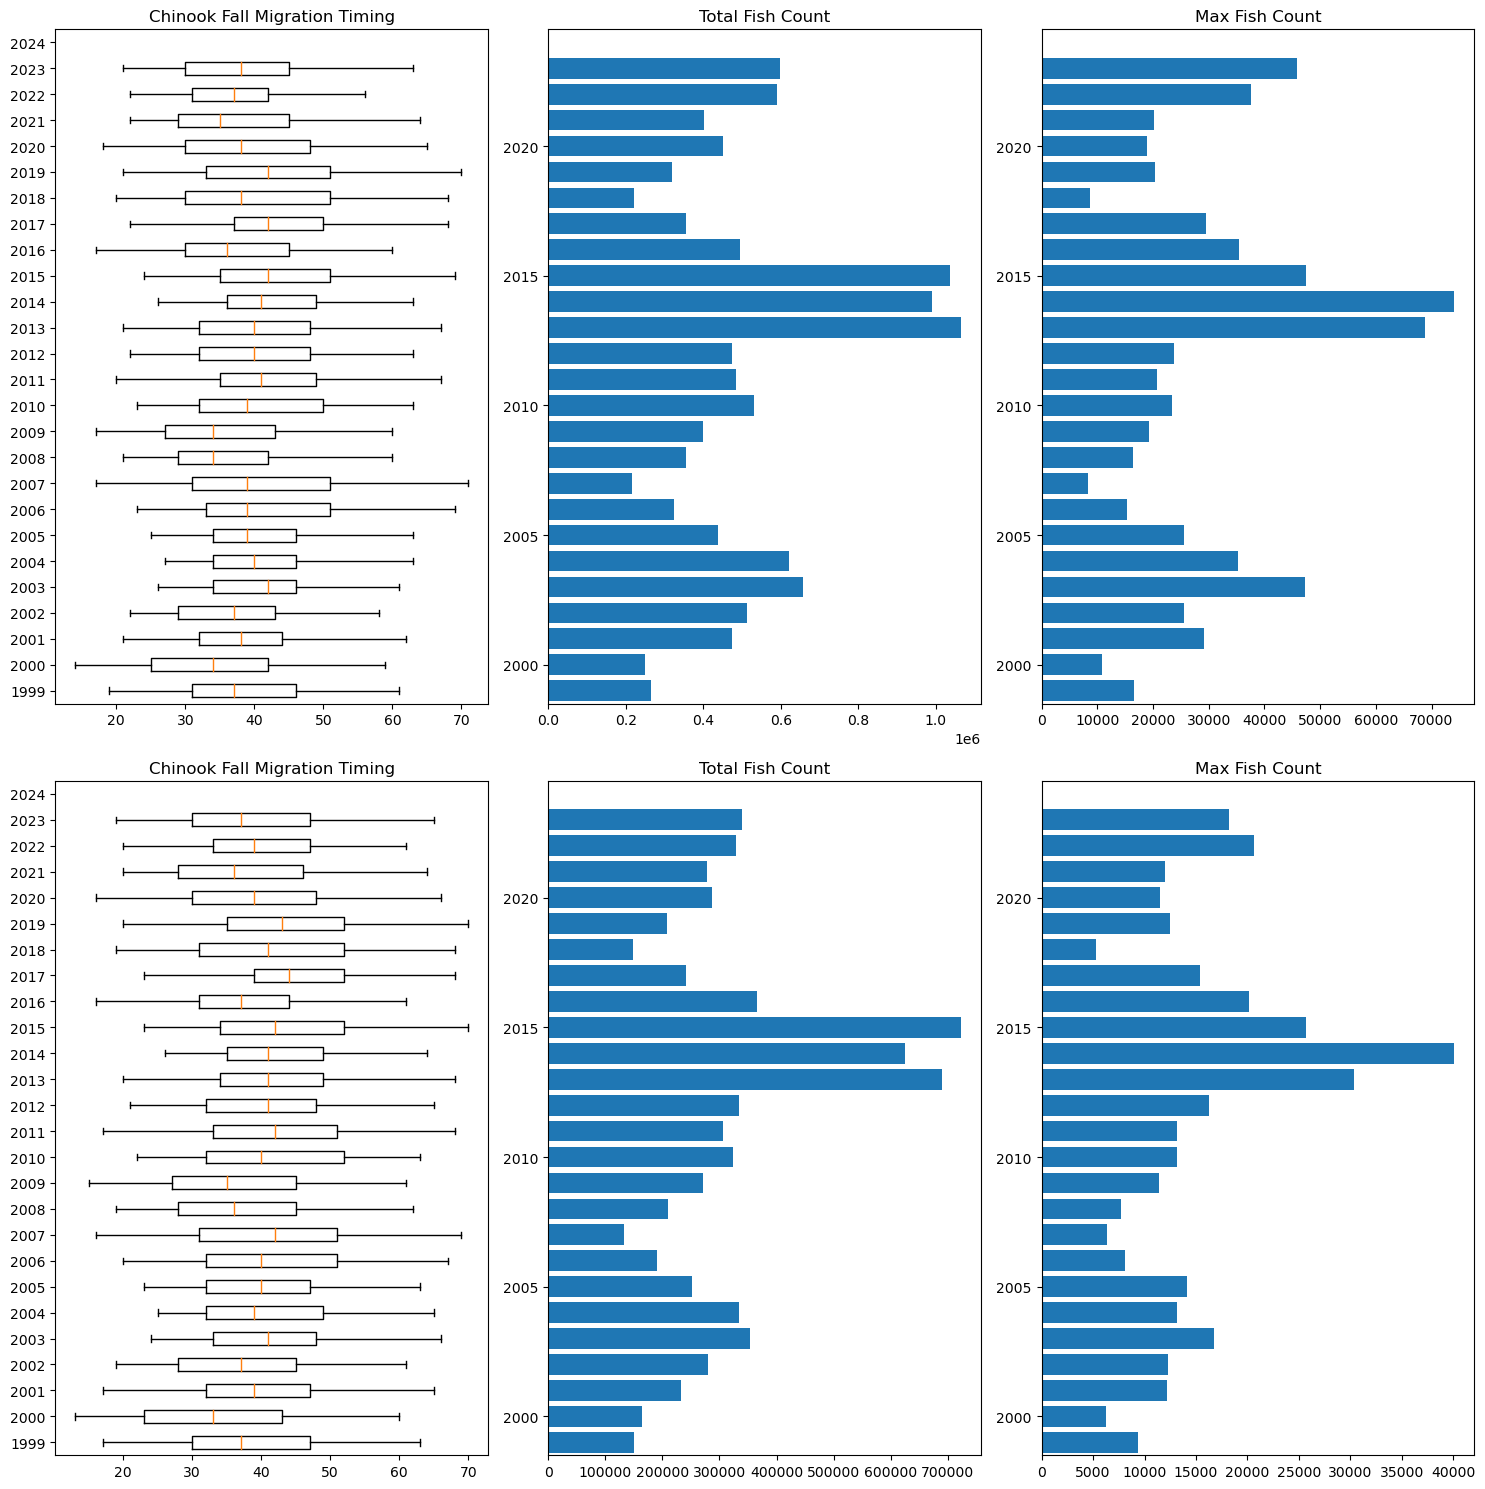

In [17]:
fig, axs = plt.subplots(2, 3, figsize=(15, 15))
axs = axs.flatten()

boxes = []
for i, row in bon_stats_df.iterrows():
    
    boxes.append(
        {
            "label": f"{row['year']}",
            "whislo": (row['5th_date'] -row["start_date"]).days,  # Bottom whisker position
            "q1": (row['25th_date'] -row["start_date"]).days,  # First quartile (25th percentile)
            "med": (row['50th_date'] -row["start_date"]).days,  # Median         (50th percentile)
            "q3": (row['75th_date'] -row["start_date"]).days,  # Third quartile (75th percentile)
            "whishi": (row['95th_date'] -row["start_date"]).days,  # Top whisker position
            "fliers": [],  # Outliers
        }
    )

axs[0].bxp(boxes, showfliers=False, vert=False);
axs[0].set_title("Chinook Fall Migration Timing")

# plot total fish count
axs[1].barh(bon_stats_df['year'], bon_stats_df['total_fish'])
axs[1].set_title("Total Fish Count")
axs[1].set_ylim(1998.5, 2024.5)

# plot max count
axs[2].barh(bon_stats_df['year'], bon_stats_df['max_count'])
axs[2].set_title("Max Fish Count")
axs[2].set_ylim(1998.5, 2024.5)

boxes = []
for i, row in tda_stats_df.iterrows():
    
    boxes.append(
        {
            "label": f"{row['year']}",
            "whislo": (row['5th_date'] -row["start_date"]).days,  # Bottom whisker position
            "q1": (row['25th_date'] -row["start_date"]).days,  # First quartile (25th percentile)
            "med": (row['50th_date'] -row["start_date"]).days,  # Median         (50th percentile)
            "q3": (row['75th_date'] -row["start_date"]).days,  # Third quartile (75th percentile)
            "whishi": (row['95th_date'] -row["start_date"]).days,  # Top whisker position
            "fliers": [],  # Outliers
        }
    )

axs[3].bxp(boxes, showfliers=False, vert=False);
axs[3].set_title("Chinook Fall Migration Timing")

# plot total fish count
axs[4].barh(tda_stats_df['year'], tda_stats_df['total_fish'])
axs[4].set_title("Total Fish Count")
axs[4].set_ylim(1998.5, 2024.5)

# plot max count
axs[5].barh(tda_stats_df['year'], tda_stats_df['max_count'])
axs[5].set_title("Max Fish Count")
axs[5].set_ylim(1998.5, 2024.5)

fig.tight_layout()


In [18]:
bon_tda_temp = pd.read_csv(proj_dir / "Code/notebooks/EDA/bon-tda.csv")
bon_tda_temp['date'] = pd.to_datetime(bon_tda_temp['Date'])
bon_tda_temp = bon_tda_temp[bon_tda_temp['date'].dt.year >= 1999].copy()

bon_tda_temp['year'] = bon_tda_temp['date'].dt.year
bon_tda_temp['month'] = bon_tda_temp['date'].dt.month
bon_tda_temp['day'] = bon_tda_temp['date'].dt.day

fish_dif = bon_stats_df['total_fish'] - tda_stats_df['total_fish']
fish_dif_percent = (bon_stats_df['total_fish'] - tda_stats_df['total_fish']) / bon_stats_df['total_fish'] * 100

lyl_percent = lyl_stats_df['total_fish'] / bon_stats_df['total_fish'] * 100

In [23]:
# lyl_stats_df.plot(x='year', y='total_fish', style='-')
lyl_stats_df

,year,start_date,end_date,total_fish,daily_mean,max_count,5th_percentile,5th_date,25th_percentile,25th_date,50th_percentile,50th_date,75th_percentile,75th_date,95th_percentile,95th_date,duration
0,2007,2007-08-01,2007-11-15,72.0,0.679245,26.0,5.0,2007-08-31,42.0,2007-10-02,42.0,2007-10-02,58.0,2007-10-09,72.0,2007-10-17,47.0
0,2008,2008-08-01,2008-11-15,24.0,0.226415,6.0,2.0,2008-08-08,11.0,2008-08-20,14.0,2008-08-26,19.0,2008-09-17,24.0,2008-10-17,70.0
0,2009,2009-08-01,2009-11-15,17.0,0.160377,4.0,2.0,2009-08-05,5.0,2009-09-04,9.0,2009-09-23,13.0,2009-09-30,17.0,2009-10-18,74.0
0,2010,2010-08-01,2010-11-15,65.0,0.613208,36.0,5.0,2010-08-11,26.0,2010-09-02,65.0,2010-09-07,65.0,2010-09-07,65.0,2010-09-07,27.0
0,2011,2011-08-01,2011-11-15,1424.0,13.433962,210.0,75.0,2011-09-02,421.0,2011-09-20,828.0,2011-09-23,1133.0,2011-09-28,1375.0,2011-09-30,28.0
0,2012,2012-08-01,2012-11-15,985.0,9.292453,445.0,75.0,2012-09-07,336.0,2012-09-12,799.0,2012-09-18,799.0,2012-09-18,937.0,2012-10-11,34.0
0,2013,2013-08-01,2013-11-15,3862.0,36.433962,795.0,223.0,2013-08-30,1268.0,2013-09-10,2063.0,2013-09-11,2985.0,2013-09-19,3683.0,2013-10-24,55.0
0,2014,2014-08-01,2014-11-15,3097.0,29.216981,417.0,502.0,2014-09-10,919.0,2014-09-11,1694.0,2014-09-17,2379.0,2014-09-23,2978.0,2014-10-02,22.0
0,2015,2015-08-01,2015-11-15,1830.0,17.264151,731.0,127.0,2015-09-01,539.0,2015-09-03,1385.0,2015-09-11,1385.0,2015-09-11,1753.0,2015-10-14,43.0
0,2016,2016-08-01,2016-11-15,154.0,1.452830,42.0,9.0,2016-08-31,72.0,2016-09-09,81.0,2016-09-20,116.0,2016-09-29,150.0,2016-11-01,62.0


In [ ]:
# lyl_stats_df.plot(x='year', y='total_fish', style='-')
lyl_stats_df

,year,start_date,end_date,total_fish,daily_mean,max_count,5th_percentile,5th_date,25th_percentile,25th_date,50th_percentile,50th_date,75th_percentile,75th_date,95th_percentile,95th_date,duration
0,2007,2007-08-01,2007-11-15,72.0,0.679245,26.0,5.0,2007-08-31,42.0,2007-10-02,42.0,2007-10-02,58.0,2007-10-09,72.0,2007-10-17,47.0
0,2008,2008-08-01,2008-11-15,24.0,0.226415,6.0,2.0,2008-08-08,11.0,2008-08-20,14.0,2008-08-26,19.0,2008-09-17,24.0,2008-10-17,70.0
0,2009,2009-08-01,2009-11-15,17.0,0.160377,4.0,2.0,2009-08-05,5.0,2009-09-04,9.0,2009-09-23,13.0,2009-09-30,17.0,2009-10-18,74.0
0,2010,2010-08-01,2010-11-15,65.0,0.613208,36.0,5.0,2010-08-11,26.0,2010-09-02,65.0,2010-09-07,65.0,2010-09-07,65.0,2010-09-07,27.0
0,2011,2011-08-01,2011-11-15,1424.0,13.433962,210.0,75.0,2011-09-02,421.0,2011-09-20,828.0,2011-09-23,1133.0,2011-09-28,1375.0,2011-09-30,28.0
0,2012,2012-08-01,2012-11-15,985.0,9.292453,445.0,75.0,2012-09-07,336.0,2012-09-12,799.0,2012-09-18,799.0,2012-09-18,937.0,2012-10-11,34.0
0,2013,2013-08-01,2013-11-15,3862.0,36.433962,795.0,223.0,2013-08-30,1268.0,2013-09-10,2063.0,2013-09-11,2985.0,2013-09-19,3683.0,2013-10-24,55.0
0,2014,2014-08-01,2014-11-15,3097.0,29.216981,417.0,502.0,2014-09-10,919.0,2014-09-11,1694.0,2014-09-17,2379.0,2014-09-23,2978.0,2014-10-02,22.0
0,2015,2015-08-01,2015-11-15,1830.0,17.264151,731.0,127.0,2015-09-01,539.0,2015-09-03,1385.0,2015-09-11,1385.0,2015-09-11,1753.0,2015-10-14,43.0
0,2016,2016-08-01,2016-11-15,154.0,1.452830,42.0,9.0,2016-08-31,72.0,2016-09-09,81.0,2016-09-20,116.0,2016-09-29,150.0,2016-11-01,62.0


In [61]:
grouped_temp = bon_tda_temp.groupby('year')

In [62]:
grouped_temp['year'].unique()

year
1999    [1999]
2000    [2000]
2001    [2001]
2002    [2002]
2003    [2003]
2004    [2004]
2005    [2005]
2006    [2006]
2007    [2007]
2008    [2008]
2009    [2009]
2010    [2010]
2011    [2011]
2012    [2012]
2013    [2013]
2014    [2014]
2015    [2015]
2016    [2016]
2017    [2017]
2018    [2018]
2019    [2019]
2020    [2020]
2021    [2021]
2022    [2022]
2023    [2023]
2024    [2024]
Name: year, dtype: object

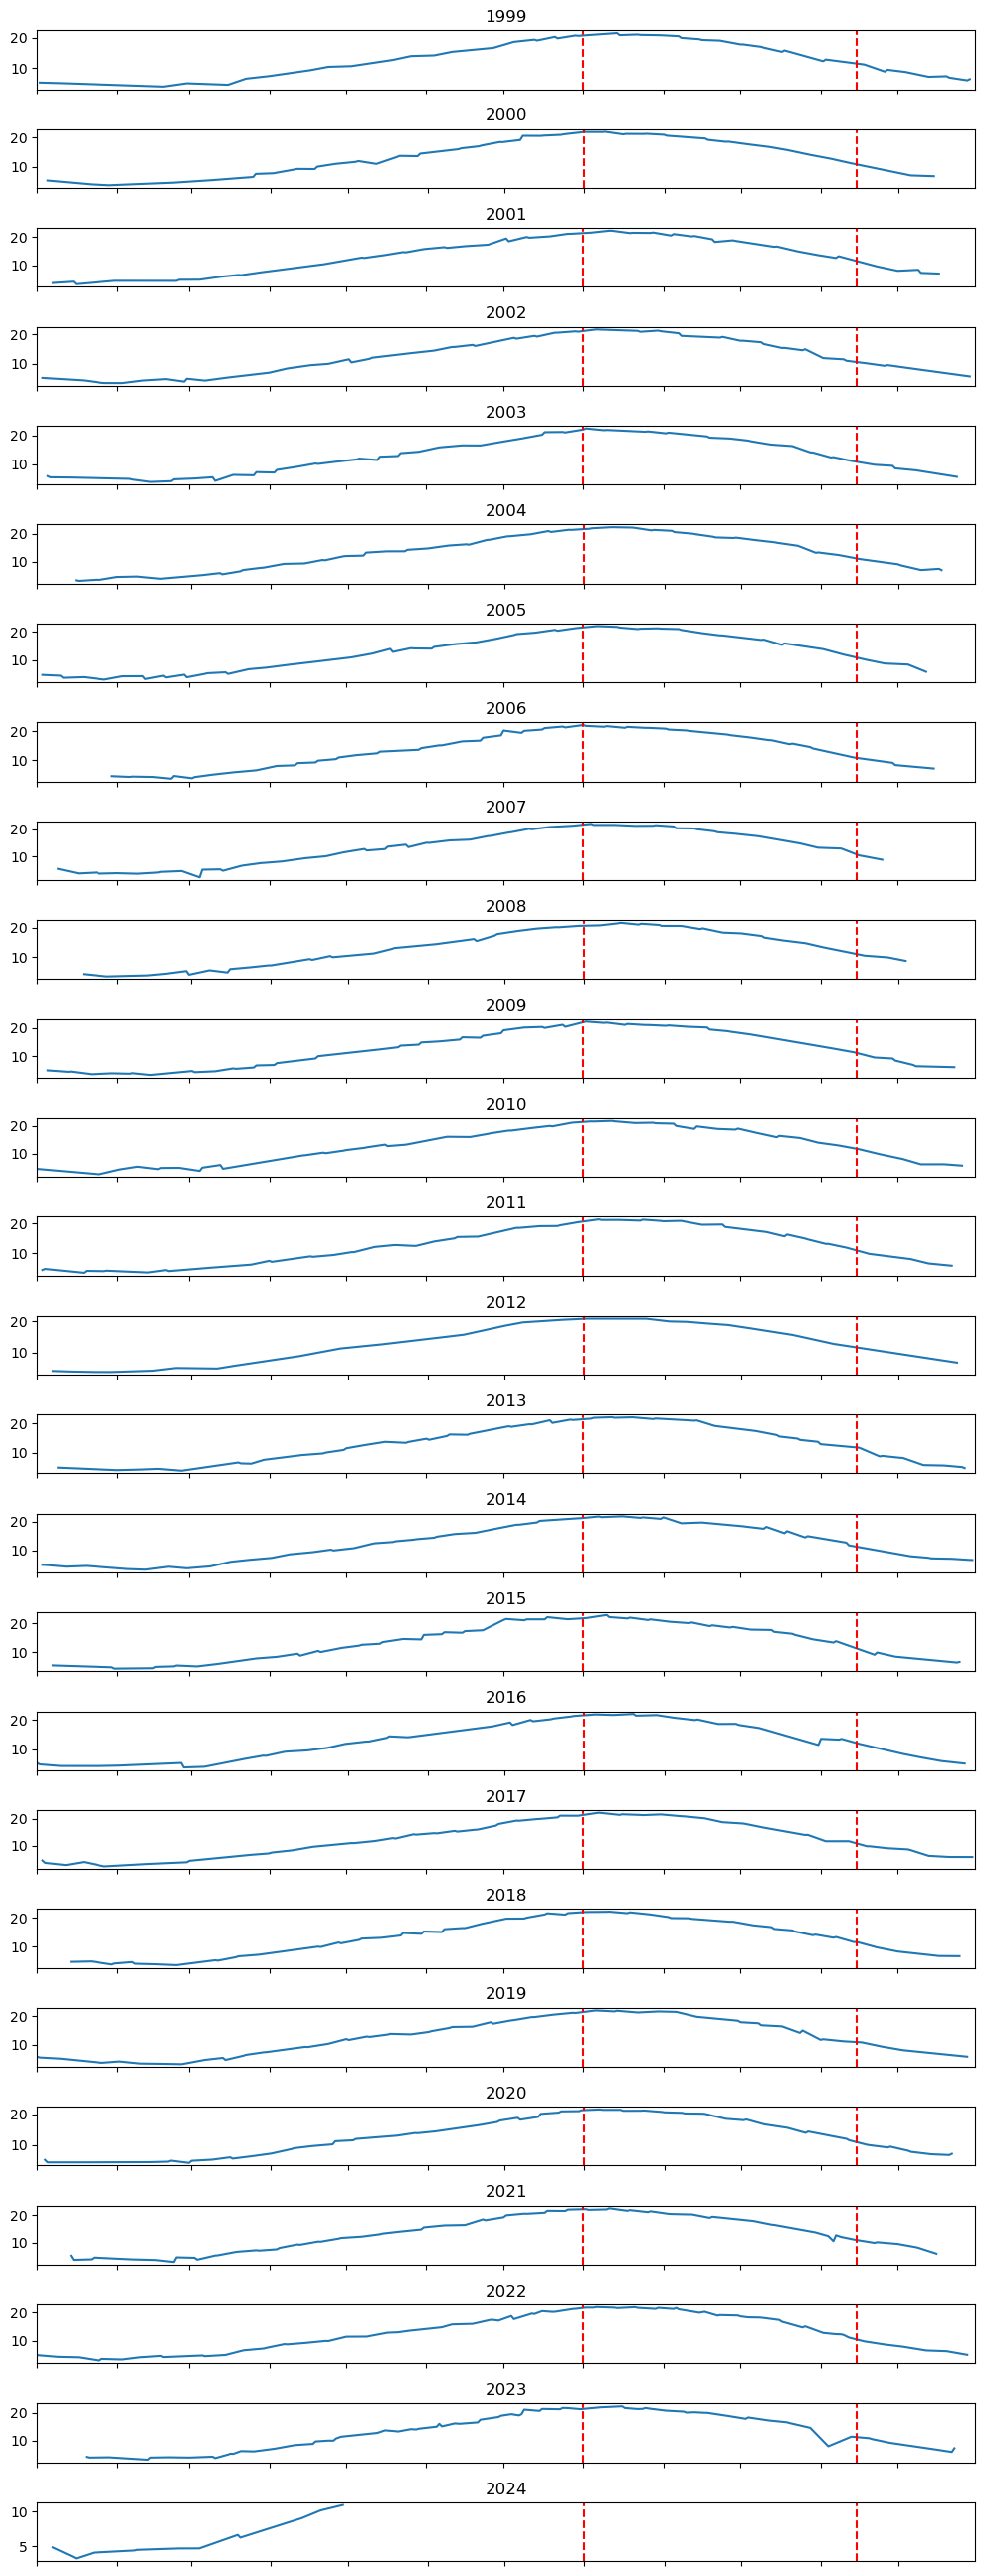

In [63]:
# for each year, plot the temperature from August 1 to November 15
fig, axs = plt.subplots(len(grouped_temp['year'].unique()), 1, figsize=(10, 1*len(grouped_temp['year'].unique())))

for i, (name, group) in enumerate(grouped_temp):
    axs[i].plot(group['date'], group['AvgTemp'])
    axs[i].set_title(name)
    axs[i].axvline(pd.Timestamp(f"{name}-{fall_start_month}-{fall_start_day}"), color='r', linestyle='--')
    axs[i].axvline(pd.Timestamp(f"{name}-{fall_end_month}-{fall_end_day}"), color='r', linestyle='--')

    axs[i].set_xlim(pd.Timestamp(f"{name}-01-01"), pd.Timestamp(f"{name}-12-31"))

    # remove x-axis labels
    axs[i].set_xticklabels([])

fig.tight_layout()

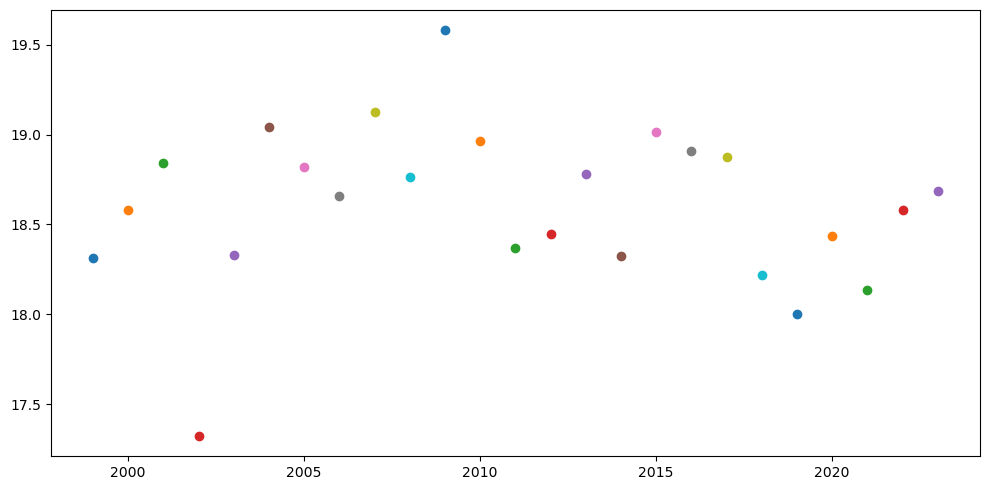

In [66]:
# for each year, plot the temperature from August 1 to November 15
fig, ax = plt.subplots(figsize=(10, 5))

years = []
mean_fall_temp = []

for i, (name, group) in enumerate(grouped_temp):

    group['date'] = pd.to_datetime(group['date'])
    group = group[(group['date']>f"{name}-{fall_start_month}-{fall_start_day}") & (group['date']<f"{name}-{fall_end_month}-{fall_end_day}")].copy()
    group['year'] = group['date'].dt.year
    group['month'] = group['date'].dt.month 
    group['day'] = group['date'].dt.day

    group['time_elapsed'] = (group['date'] - pd.Timestamp(f"{name}-{fall_start_month}-{fall_start_day}")).dt.days

    if not group.empty:
        ax.scatter(name, group['AvgTemp'].mean(), label=name)
        years.append(name)
        mean_fall_temp.append(group['AvgTemp'].mean())

        # print(group)

    # # create a new date column that is this_year-month-day
    # group['modified_date'] = pd.to_datetime(f"2020-{group['month']}-{group['day']}")
    # ax.plot(group['modified_date'], group['AvgTemp'], label=name)



    # # ax.axvline(pd.Timestamp(f"{name}-{fall_start_month}-{fall_start_day}"), color='r', linestyle='--')
    # # ax.axvline(pd.Timestamp(f"{name}-{fall_end_month}-{fall_end_day}"), color='r', linestyle='--')

    # # ax.set_xlim(pd.Timestamp(f"{name}-01-01"), pd.Timestamp(f"{name}-12-31"))

    # # remove x-axis labels
    # ax.set_xticklabels([])

fig.tight_layout()

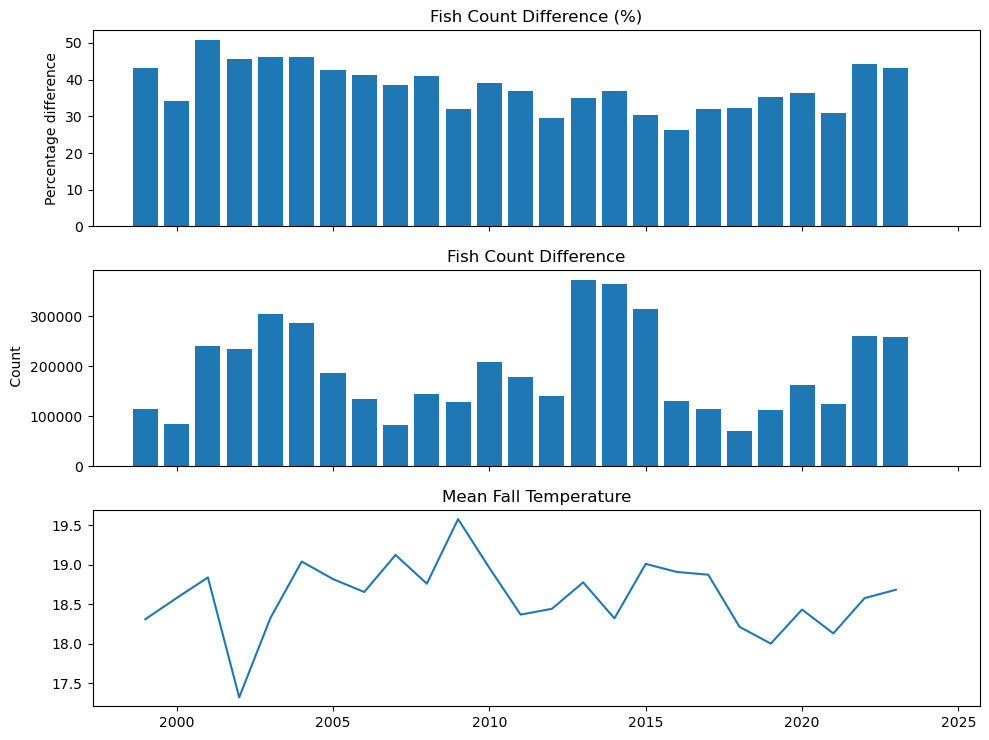

In [74]:
# plot the fish count difference between BON and TDA
fig, axs = plt.subplots(3, 1, figsize=(10, 7.5), sharex=True)
axs[0].bar(bon_stats_df['year'], fish_dif_percent)
axs[0].set_title("Fish Count Difference (%)")
axs[0].set_ylabel("Percentage difference")

axs[1].bar(bon_stats_df['year'], fish_dif)
axs[1].set_title("Fish Count Difference")
axs[1].set_ylabel(" Count")

axs[2].plot(years, mean_fall_temp)
axs[2].set_title("Mean Fall Temperature")

fig.tight_layout()

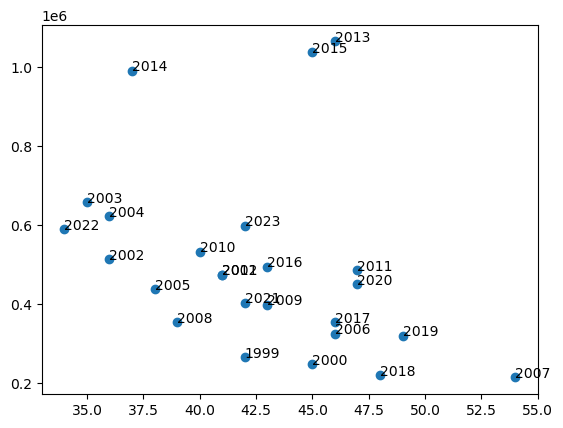

In [21]:
fig, ax = plt.subplots()
# plot duration and total fish annotated with the duration
ax.scatter(stats_df['duration'], stats_df['total_fish'])
for i, row in stats_df.iterrows():
    ax.annotate(row['year'], (row['duration'], row['total_fish']))

# ax.scatter(stats_df['duration'], stats_df['max_count'], color='r')
# ax.scatter((stats_df['5th_date'] -stats_df["start_date"]).dt.days, stats_df['total_fish'], color='b')
# ax.set_ylim(0, .8e6)


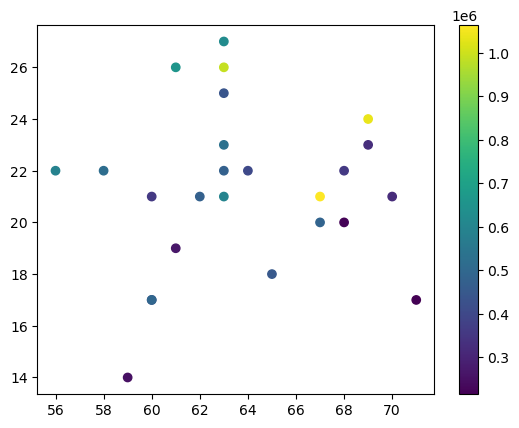

In [58]:
fig, ax = plt.subplots()
# plot duration and total fish annotated with the duration
# ax.scatter(stats_df['duration'], stats_df['total_fish'])
# for i, row in stats_df.iterrows():
#     ax.annotate(row['duration'], (row['duration'], row['total_fish']))

# ax.scatter(stats_df['duration'], stats_df['max_count'], color='r')
m = ax.scatter((stats_df['95th_date'] -stats_df["start_date"]).dt.days,(stats_df['5th_date'] -stats_df["start_date"]).dt.days, c=stats_df['total_fish'])
# add colorbar
cbar = fig.colorbar(m)
